In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Прочитайте файл 2017_jun_final.csv за допомогою методу read_csv
df = pd.read_csv('2017_jun_final.csv')

In [3]:
#Прочитайте отриману таблицю, використовуючи метод head
df.head()

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,...,False,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одесса,до 200 человек,...,False,ниже среднего,"Desktop Applications,Веб-разработка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 и более лет,0.5,4500,500,Другой,до 10 человек,...,False,средний,"Desktop Applications,Веб-разработка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


In [4]:
#Визначте розмір таблиці за допомогою методу shape
lines, columns = df.shape
print(f'Number of lines: {lines}')
print(f'Number of columns: {columns}')

Number of lines: 8704
Number of columns: 25


In [5]:
#Визначте типи всіх стовпців за допомогою dataframe.dtypes
df.dtypes

N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [6]:
#Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
df.isnull().sum()

N                                      0
Должность                              0
Язык.программирования               3850
Специализация                       7219
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Университет                          358
Еще.студент                            0
Уровень.английского                    0
Предметная.область                   223
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
Валюта                              8694
cls             

In [7]:
#Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"
df_lang = df['Язык.программирования']
df_clean = df.dropna(axis=1)
df_cleaned = pd.concat([df_clean, df_lang], axis=1)
df_cleaned.head(5)

,N,Должность,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Язык.программирования
0,1,Junior QA engineer,0.5,0.5,400,0,Харьков,до 10 человек,Аутсорсинговая,женский,20,Незаконченное высшее,True,ниже среднего,12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN
1,2,Junior QA engineer,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,Аутсорсинговая,женский,21,Незаконченное высшее,True,выше среднего,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN
2,3,Software Engineer,4,1,2500,800,Киев,до 1000 человек,Аутсорсинговая,мужской,26,Высшее,False,средний,12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,C#/.NET
3,4,Software Engineer,5,4,2000,400,Одесса,до 200 человек,Продуктовая,мужской,30,Среднее,False,ниже среднего,12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,JavaScript
4,5,Senior Software Engineer,10 и более лет,0.5,4500,500,Другой,до 10 человек,Продуктовая,мужской,30,Техникум / Колледж,False,средний,12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,JavaScript


In [8]:
#Знову порахуйте, яка частка пропусків міститься в кожній колонці і переконайтеся, що залишився тільки стовпець "Мова.програмування"
df_cleaned.isnull().sum()

N                                      0
Должность                              0
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Еще.студент                            0
Уровень.английского                    0
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
Язык.программирования               3850
dtype: int64

In [9]:
#Видаліть усі рядки у вихідній таблиці за допомогою методу dropna
df_cleaned = df_cleaned.dropna()
df_cleaned.head(5)

,N,Должность,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Язык.программирования
2,3,Software Engineer,4,1,2500,800,Киев,до 1000 человек,Аутсорсинговая,мужской,26,Высшее,False,средний,12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,C#/.NET
3,4,Software Engineer,5,4,2000,400,Одесса,до 200 человек,Продуктовая,мужской,30,Среднее,False,ниже среднего,12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,JavaScript
4,5,Senior Software Engineer,10 и более лет,0.5,4500,500,Другой,до 10 человек,Продуктовая,мужской,30,Техникум / Колледж,False,средний,12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,JavaScript
6,7,Junior Software Engineer,1,меньше 3 месяцев,600,100,Хмельницкий,до 50 человек,Аутсорсинговая,мужской,23,Высшее,False,ниже среднего,12/06/2017 13:04:26,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.0,0.0,600,C#/.NET
7,8,Senior Software Engineer,6,1,3300,500,Киев,до 10 человек,Продуктовая,мужской,28,Высшее,False,выше среднего,12/06/2017 13:04:27,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:53....,6.0,1.0,3300,C++


In [10]:
#Визначте новий розмір таблиці за допомогою методу shape
lines, columns = df_cleaned.shape
print(f'Number of lines: {lines}')
print(f'Number of columns: {columns}')

Number of lines: 4854
Number of columns: 20


In [11]:
#Створіть нову таблицю python_data, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування Python
python_data = df_cleaned.loc[df['Язык.программирования'] == 'Python']
python_data.head(5)

,N,Должность,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Язык.программирования
12,13,Software Engineer,1,меньше 3 месяцев,800,200,Киев,до 50 человек,Аутсорсинговая,мужской,26,Высшее,False,ниже среднего,12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800,Python
68,69,Software Engineer,1.5,0.5,900,900,Киев,до 10 человек,Стартап,мужской,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.5,0.5,900,Python
87,88,Junior Software Engineer,0.5,0.5,600,0,Киев,до 10 человек,Аутсорсинговая,мужской,19,Незаконченное высшее,True,выше среднего,12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.5,600,Python
114,115,Junior Software Engineer,1.5,0.5,685,250,Киев,до 1000 человек,Аутсорсинговая,мужской,21,Незаконченное высшее,False,средний,12/06/2017 13:14:52,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.5,0.5,685,Python
143,144,Junior Software Engineer,1,1,750,250,Киев,до 10 человек,Аутсорсинговая,мужской,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:19:10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,1.0,750,Python


In [12]:
#Визначте розмір таблиці python_data за допомогою методу shape
lines, columns = python_data.shape
print(f'Number of lines: {lines}')
print(f'Number of columns: {columns}')

Number of lines: 207
Number of columns: 20


In [13]:
#Використовуючи метод groupby, виконайте групування за стовпчиком "Посада"
python_data.groupby(["Должность"])
python_data.head(5)

,N,Должность,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Язык.программирования
12,13,Software Engineer,1,меньше 3 месяцев,800,200,Киев,до 50 человек,Аутсорсинговая,мужской,26,Высшее,False,ниже среднего,12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800,Python
68,69,Software Engineer,1.5,0.5,900,900,Киев,до 10 человек,Стартап,мужской,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.5,0.5,900,Python
87,88,Junior Software Engineer,0.5,0.5,600,0,Киев,до 10 человек,Аутсорсинговая,мужской,19,Незаконченное высшее,True,выше среднего,12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.5,600,Python
114,115,Junior Software Engineer,1.5,0.5,685,250,Киев,до 1000 человек,Аутсорсинговая,мужской,21,Незаконченное высшее,False,средний,12/06/2017 13:14:52,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.5,0.5,685,Python
143,144,Junior Software Engineer,1,1,750,250,Киев,до 10 человек,Аутсорсинговая,мужской,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:19:10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,1.0,750,Python


In [14]:
#Створіть новий DataFrame, де для згрупованих даних за стовпчиком "Посада", виконайте агрегацію даних за допомогою методу agg і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"
data_agg = df_cleaned.groupby(["Должность"]).agg({"Зарплата.в.месяц": ['min', 'max']})
data_agg

Зарплата.в.месяц       
                                           min    max
Должность                                            
Data Scientist / Data Analyst             2700   2700
DevOps                                    7000   7000
ERP / CRM                                 2000   2000
HTML coder                                 385    600
Junior Software Engineer                    75   2600
Product Manager                           3000   3000
Senior Software Engineer                   350   9200
Software Engineer                          100   7000
System Architect                           400  10000
Team lead                                 2500   4000
Technical Lead                             500  18000

In [15]:
#Створіть функцію fill_avg_salary, яка повертатиме середнє значення заробітної плати на місяць. Використовуйте її для методу apply та створіть новий стовпчик "avg"
def fill_avg_salary(df: pd.DataFrame):
    return df.mean()
avg=df_cleaned.groupby('Должность').agg('Зарплата.в.месяц').apply(fill_avg_salary)
data_agg['avg']=avg
data_agg

Зарплата.в.месяц                 avg
                                           min    max             
Должность                                                         
Data Scientist / Data Analyst             2700   2700  2700.000000
DevOps                                    7000   7000  7000.000000
ERP / CRM                                 2000   2000  2000.000000
HTML coder                                 385    600   457.000000
Junior Software Engineer                    75   2600   605.658594
Product Manager                           3000   3000  3000.000000
Senior Software Engineer                   350   9200  3243.200926
Software Engineer                          100   7000  1678.630074
System Architect                           400  10000  4387.076923
Team lead                                 2500   4000  3250.000000
Technical Lead                             500  18000  3664.272000

In [16]:
#Створіть описову статистику за допомогою методу describe для нового стовпчика.
data_agg['avg'].describe()

count      11.000000
mean     2907.803502
std      1828.363270
min       457.000000
25%      1839.315037
50%      3000.000000
75%      3457.136000
max      7000.000000
Name: avg, dtype: float64

In [17]:
#Збережіть отриману таблицю в CSV файл
data_agg.to_csv('Avg_salary_2017.csv')

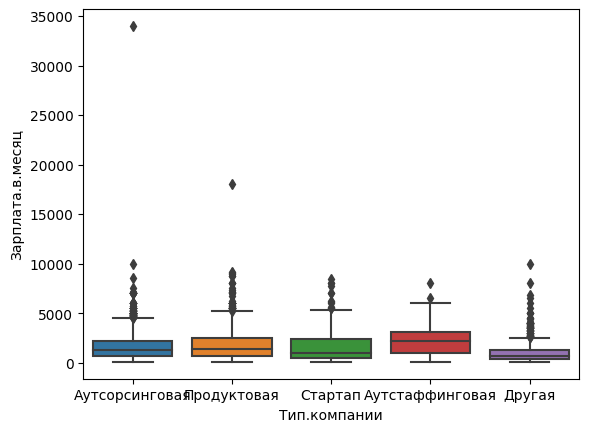

In [22]:
sns.boxplot(x="Тип.компании", y="Зарплата.в.месяц", data=df)
plt.show()

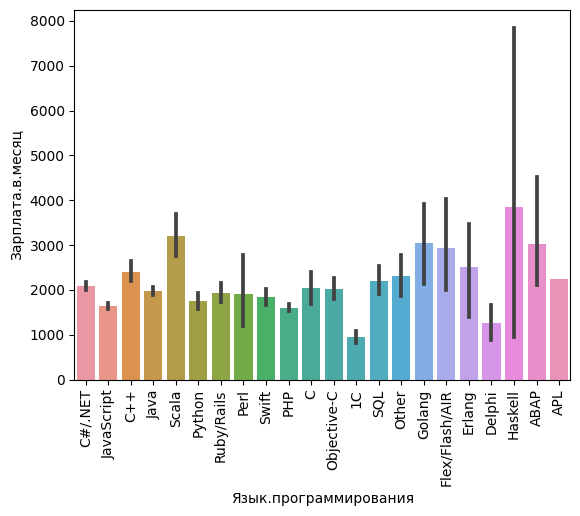

In [25]:
sns.barplot(x="Язык.программирования", y="Зарплата.в.месяц", data=df)
plt.xticks(rotation=90)
plt.show()

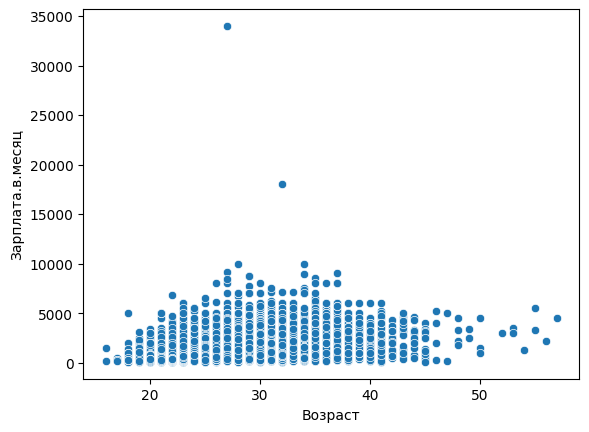

In [27]:
sns.scatterplot(x="Возраст", y="Зарплата.в.месяц", data=df)
plt.show()